In [11]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
from tools import train_test
from tools import plots

# pandas displaying options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
#pd.set_option('display.height', 1000)
#pd.set_option('display.width', 1000)

# read all results into infos dataframe
rdir = './results'
infos = pd.DataFrame()
for root, subdirs, files in os.walk(rdir):
    if root[len(rdir)+1:].count(os.sep) == 2:
        if 'model_info.tsv' in files:
            info = pd.read_csv(root + '/model_info.tsv', sep='\t')
            timestamp = str(root.split(os.sep)[-1])
            
            # add loss stats to info
            if 'learning_curve.tsv' in files:
                learning_curve = pd.read_csv(root + '/learning_curve.tsv', sep='\t')
                if info['log_type'].iloc[0] == 'epoch':
                    info['epoch_loss_min'] = learning_curve['epoch_loss'].min()
                    info['epoch_loss_last'] = learning_curve['epoch_loss'].iloc[-1]
            
            info.index = [timestamp]
            infos = pd.concat((infos, info))
            
# define helper functions
def filter_by_timestamps(df, timestamps):
    if type(timestamps) == list:
        timestamps = [unicode(t) for t in timestamps]
        return df.loc[df.index.isin(timestamps)]
    else:
        return df

def learning_curve_from_df(df, timestamps=None):
    df = filter_by_timestamps(df, timestamps)
    for idx,row in df.iterrows():
        model_path = './results/' + row['dataset_name'] +'/'+ row['model_name'] +'/'+ idx
        learning_curve = pd.read_csv(model_path + '/learning_curve.tsv', sep='\t')
        fig = plots.plot_learning_curve(learning_curve, row)
        
def export_model_infos(filepath, df, timestamps=None):
    df = filter_by_timestamps(df, timestamps)
    output.to_csv(filepath, sep='\t')
    
def compare_models(df, timestamps=None):
    df = filter_by_timestamps(df, timestamps)
    columns = []
    for col in df.columns.tolist():
        if len(df[col].unique()) > 1:
            columns.append(col)
    return df.loc[:, columns]

/home/andrey/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:31: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False



# Analysis

## Filter data

In [12]:
filt = infos.loc[
       (infos['model_name']   == 'Analogy')
        &(infos['dataset_name'] == 'NELL186')
#     &(infos['opt_method'] == 'RMSProp')
#     &(infos['acc'] > 0.70)
#     &(infos['margin'] >= 4)
#     &(infos['n_epochs'] >= 1000)
].sort_index()

filt.transpose()

,1526567410,1552996071,1552996620,1552996885,1552997383,1552997647
Unnamed: 0,0,0,0,0,0,0
acc,0.928471,0.506421,0.813303,0.917235,0.5,0.5
batch_size,NaN,NaN,NaN,NaN,NaN,NaN
bern,0,0,1,1,1,1
cuda_device,1,1,1,1,1,1
dataset_name,NELL186,NELL186,NELL186,NELL186,NELL186,NELL186
ent_neg_rate,4,4,4,4,4,4
epoch_loss_last,0.830182,6.95621,2.31509,1.07538,6.93147,6.93147
epoch_loss_min,0.828286,6.9562,2.3146,1.07239,6.93147,6.93147
hits_10_filter,0.5499,0.0009,0.1633,0.5166,1,1


In [6]:
stamps = [1527033688,1550252770, 1550253987]
filter_by_timestamps(filt, stamps).transpose()

""
Unnamed: 0
acc
batch_size
bern
cuda_device
dataset_name
ent_neg_rate
epoch_loss_last
epoch_loss_min
hits_10_filter


## Plot learning curve

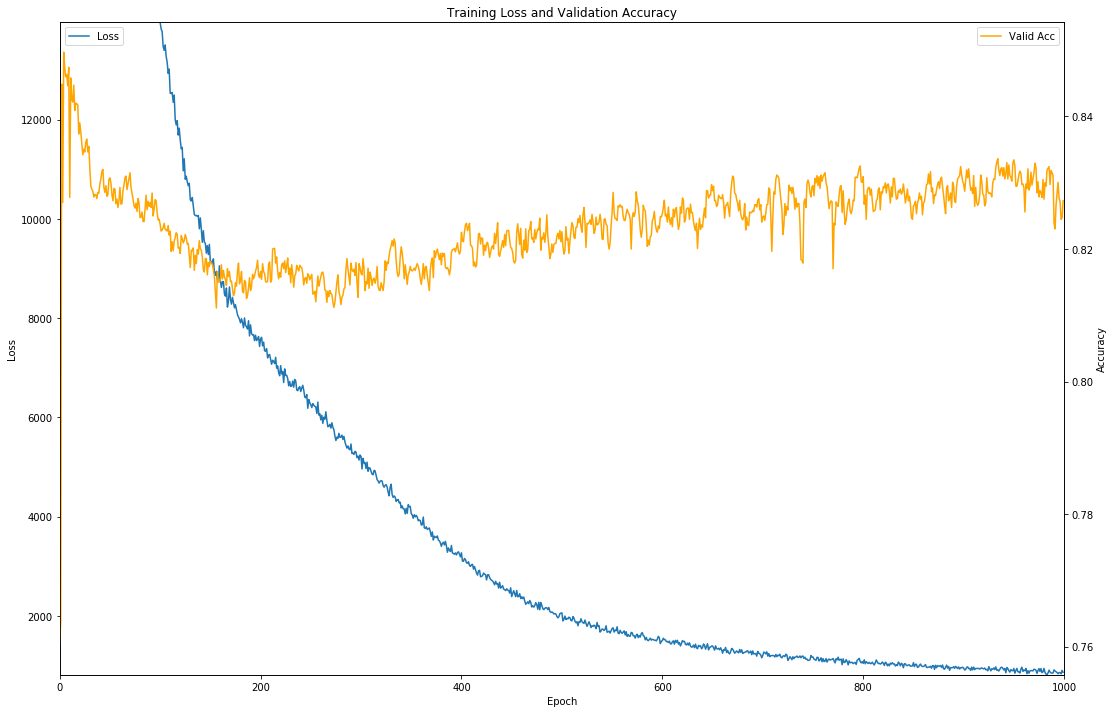

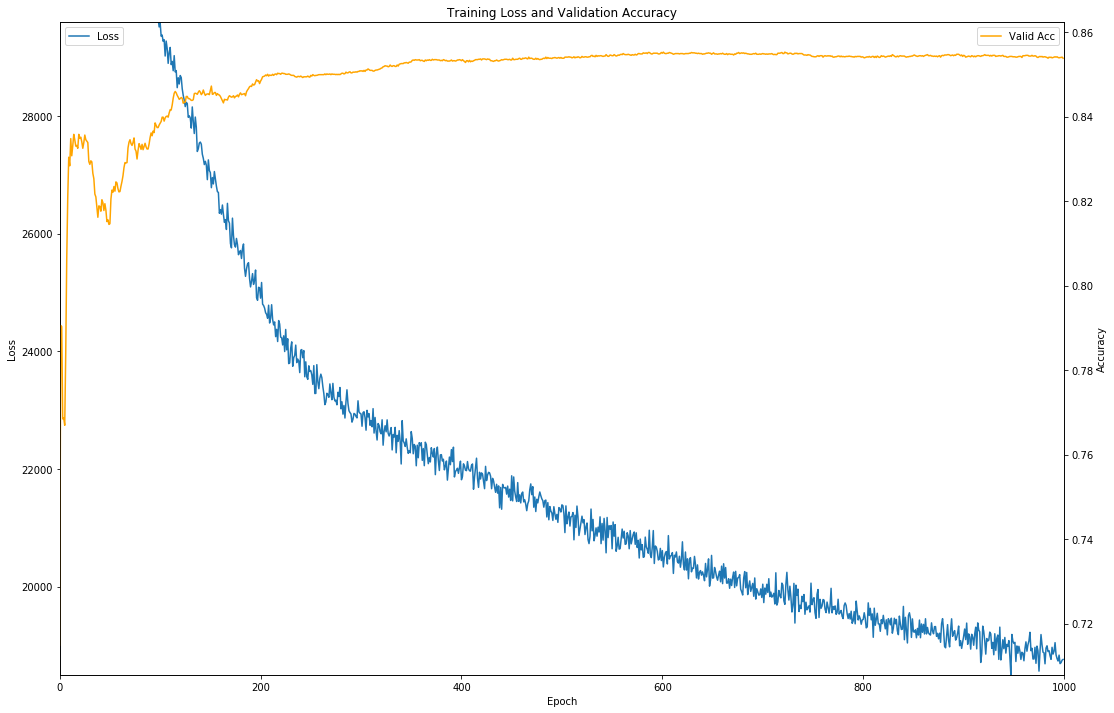

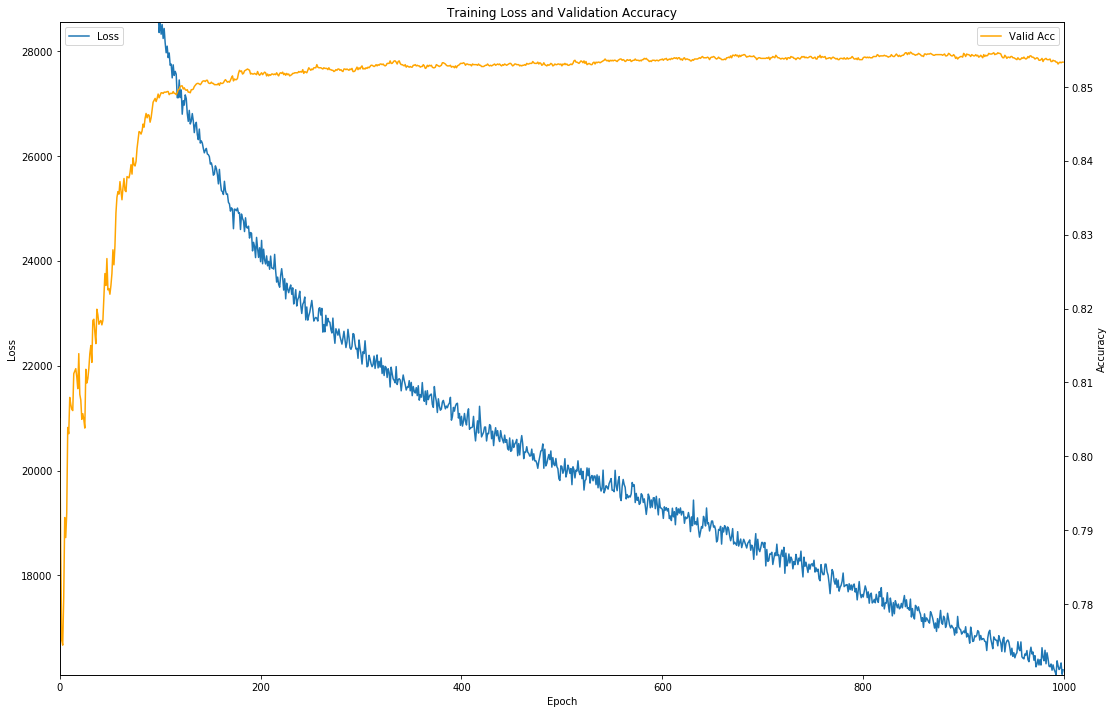

In [11]:
learning_curve_from_df(filt, stamps)

## Compare two or more models

In [12]:
compare_models(filt, stamps).transpose()

,1527033688,1550252770,1550253987
acc,0.825433,0.851999,0.851831
epoch_loss_last,865.306,18765,16200.3
epoch_loss_min,814.173,18504.3,16106.1
hits_10_filter,0.347786,0.336536,0.337189
hits_10_raw,0.344731,0.335314,0.335588
hits_1_filter,0.194497,0.183963,0.185354
hits_1_raw,0.189968,0.180972,0.182362
hits_3_filter,0.272679,0.26204,0.266106
hits_3_raw,0.268929,0.257637,0.260966
k,100,50,100


# Export a set of models

In [ ]:
export_model_infos(
    '~/Downloads/best_models.tsv',
    df,
    timestamps=[1526710056, 1526710447, 1526711822, 1526417226, 1526535074])

# Debug